<h1> <p style="text-align:center;"> MATH 210 Project 1</p> </h1>

<h2> <p style="text-align:center;"> Classifying and Solving Differential Equations with `sympy.ode` </p> </h2>

The Python library **SymPy** is used for symbolic computation and has a subpackage `sympy.ode` which deals with ordinary differential equations (ODEs) as mentioned in the [documentation](http://docs.sympy.org/dev/modules/solvers/ode.html). This notebook will explore the differential equation solver `dsolve` and the differential equation classifier `classify_ode`. The three classifications of differential equations that will be adressed are *separable, exact and linear* (in the form of an example of Newton's cooling law).

## Contents

1. Introduction to `classify_ode` and `dsolve`
2. Separable ODE
3. Exact ODE
4. Linear
5. Exercises

In [69]:
import sympy as sy
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Introduction to `classify_ode` and `dsolve`

##### Differential Equations

Differential equations express the relation between functions and their derivatives. They can be used to study heat flow, flow of current and model chronic infectious diseases among other things. This notebook will look at *ordinary, first order, linear* differential equations only. Below is an example of a slope field of a system of differential equations from [math.stackexchange.com](http://math.stackexchange.com/questions/452007/how-to-draw-graphs-of-odes)

![diffeq](https://i.stack.imgur.com/IoZP4.png)

**Ordinary** differential equations are equations of only one variable. For example, $y'' + \sqrt{t} \cdot y = t^2$ is an ordinary differential equation of a function $y(t)$.

The **order** of an ordinary differential equation is the highest number of derivatives in the problem. 
For example:
* $y' - y = 0$ is **first** order
* $y'' - y = t^7$ is **second** order
* $y'''' + y'' = 3t$ is **fourth** order

A **linear** ordinary differential equation has only linear functions of $y, y', y'', ...$. For example:
* $t^3 \cdot y'' - \sin(t) \cdot y' = e^{2t}$ is linear
* $y' + \cos(y) = t$ is nonlinear

##### sympy.solvers.ode.classify_ode

The function `classify_ode` takes a differential equation $a(t) \cdot \frac{dy}{dt} + b(t) \cdot y - c(t) = 0$ and a function $y(t)$. The other arguments are set to default values and aren't of any particular use. It returns a tuple of all the possible classifications that fit the given ode. More details can be found in the [documentation page](http://docs.sympy.org/dev/modules/solvers/ode.html#classify-ode). 

##### sympy.solvers.ode.dsolve

The function `dsolve` takes an ordinary differential equation (that is supported by the subpackage and assumed to be equal to zero) and a single variable function. The other arguments are set to default values. One interesting argument is `hint` which uses `classify_ode` to find a method with which to solve the equation. More can be found in the [documentation page.](http://docs.sympy.org/dev/modules/solvers/ode.html#dsolve)

### 2. Separable Differential Equations

[Separable differential equations](https://en.wikipedia.org/wiki/Separation_of_variables) are equations where the $y$ terms are placed on one side of the equation and the $t$ terms are placed on the other side. The following is an example of a separable differential equation and how it can be solved analytically:

$$
y' = -7y
$$

$$\
\frac{dy}{dt} = -7y
$$

$$
\int \frac{dy}{y} = \int -7 dt
$$

$$
y = Ce^{-7t}
$$

Using `classify_ode`, the first result that comes up is 'separable' which is what we expect. 

In [70]:
t, y = sy.symbols('t y')
f = sy.diff(y(t), t) + 7*y(t)
sy.classify_ode(f, y(t))[0]

'separable'

Now, we will use `dsolve` and see if it gives us the same answer. First, we must set the differential equation equal to zero: 

$$y' + 7y = 0$$

Before we can use `dsolve`, we must define our varibles using `sympy.symbols` and use `sympy.diff` to represent $y'$.

In [71]:
t, y = sy.symbols('t y')
f = sy.diff(y(t), t) + 7*y(t)
Y = sy.ode.dsolve(f, y(t))
Y

Eq(y(t), C1*exp(-7*t))

The answer is given in a tuple of length: the function with which the equation was taken and the answer. Because this answer is a tuple, we cannot unpack it. However, we can make it easier to read using `pprint` also known as pretty print.

In [72]:
sy.pprint(Y)

           -7⋅t
y(t) = C₁⋅ℯ    


Now it is clear that we have obtained the same answer from our analytical calculations. To ensure this is truly the correct answer, we can superimpose this equation on the slope field using the `slope_field` function from Assignment 4 with some modifications.

In [77]:
def slope_field(f,xlims,ylims,grid_step):
    '''Plot the slope field of the given function f(x) on the interval [xlim,ylim] with the true solution superimposed.
    
    INPUT:
        f (function): Vectorized function of one variable 
        xlims (list): List of length 2 giving the limits for the x values
        ylims (list): List of length 2 giving the limits for the y values
        grid_step (number): Distance between each point 
        
    OUTPUT:
        Plot of slope field and true solution (image)
    '''
    # Generate list of x and y values
    xs = np.arange(xlims[0],xlims[1],grid_step)
    ys = np.arange(ylims[0],ylims[1],grid_step)
    L = grid_step * 0.4
    #Calculate and plot true solution for different constant values
    t = np.linspace(xlims[0],xlims[1],1000)
    for c in [0,0.1,0.5,1,3,5,7]:
        Y = c * np.exp(-7*t)
        plt.plot(t,Y,'r')
    # Calculate and plot the slope for each (x,y)   
    for x in xs:
        for y in ys:
            m = f(x,y)
            theta = np.arctan(m)
            dx = L * np.cos(theta)
            dy = L * np.sin(theta)
            plt.plot([x-dx,x+dx],[y-dy,y+dy],'g')
    plt.xlim(xlims), plt.ylim(ylims), plt.xlabel('t'), plt.ylabel('y')
    plt.title('y = ce^(-7t) Superimposed on Slope Field')
    plt.show()

In [78]:
def f(t,y):
    return -7*y

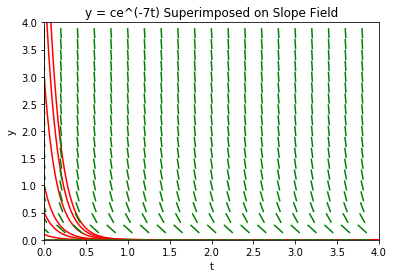

In [79]:
slope_field(f,[0,4],[0,4],0.2,)

### 3. Exact Equations

[Exact equations](https://en.wikipedia.org/wiki/Exact_differential_equation) often arise in conservation laws of physics and in engineering. These are functions $F(x, y(x)$ which equal a constant. Taking the total derivative gives:

$$
dF = \frac{\partial F}{\partial x} \cdot dx + \frac{\partial F}{\partial y} \cdot dy = 0
$$

Letting $M(x,y) = \frac{\partial F}{\partial x}$ and $N(x,y) = \frac{\partial F}{\partial y}$ and dividing both sides by $dx$ gives:

$$
M(x,y) + N(x,y) \cdot \frac{dy}{dx} = 0
$$

If a differential equation can be written in this form and satisfies the condition $\frac{\partial M}{\partial y} = \frac{\partial N}{\partial x}$ then it is an exact equation.

#### Example:  Solve $\frac{dy}{dx} = \frac{-2x - y}{x - 1}$

First, let's see if it is exact.

In [76]:
x, y = sy.symbols('x y')
f = 2*x + y(x) + (x - 1)*sy.diff(y(x), x)
sy.classify_ode(f, y(x))

('1st_exact',
 '1st_linear',
 'almost_linear',
 'linear_coefficients',
 '1st_power_series',
 'lie_group',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'almost_linear_Integral',
 'linear_coefficients_Integral')

In [48]:
x, y = sy.symbols('x y')
Y = sy.ode.dsolve(f, y(x))
sy.pprint(Y)

             2
       C₁ - x 
y(x) = ───────
        x - 1 


In [84]:
def slope_field(f,xlims,ylims,grid_step,N):
    '''Plot the slope field of the given function f(x) on the interval [xlim,ylim] with the true solution superimposed.
    
    INPUT:
        f (function): Vectorized function of one variable 
        xlims (list): List of length 2 giving the limits for the x values
        ylims (list): List of length 2 giving the limits for the y values
        grid_step (number): Distance between each point
        N (integer): End point for list of c values
        
    OUTPUT:
        Plot of slope field and true solution (image)
    '''
    # Generate list of x and y values
    xs = np.arange(xlims[0],xlims[1],grid_step)
    ys = np.arange(ylims[0],ylims[1],grid_step)
    L = grid_step * 0.4
    #Calculate and plot true solution for different constant values
    t = np.linspace(xlims[0],xlims[1],1000)
    for c in range(0,N):
        Y = (c - t**2) / (t - 1)
        plt.plot(t,Y,'r')
    # Calculate and plot the slope for each (x,y)   
    for x in xs:
        for y in ys:
            m = f(x,y)
            theta = np.arctan(m)
            dx = L * np.cos(theta)
            dy = L * np.sin(theta)
            plt.plot([x-dx,x+dx],[y-dy,y+dy],'g')
    plt.xlim(xlims), plt.ylim(ylims), plt.xlabel('t'), plt.ylabel('y')
    plt.title('y = (c - t^2)/(t - 1) Superimposed on Slope Field')
    plt.show()

In [85]:
def f(x,y):
    return (-2*x - y) / (x - 1)

Note that there is a vertical asymptote at $x = 1$ which will give an error.

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


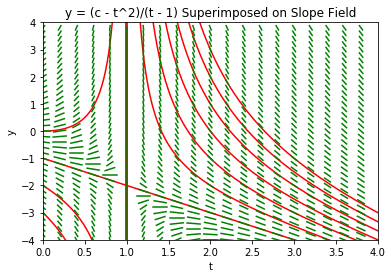

In [86]:
slope_field(f,[0,4], [-4,4], 0.2, 8)

### 4. Linear Equations

#### Example: Newton's Cooling Law

[Newton's law of cooling](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling) is used to describe the rate at which an object looses heat over time. It can be used for a cup of coffee cooling on a kitchen table to finding the time of death of a corpse. The equation is given by:

$$
\frac{dT}{dt} = k ( T_{room} - T)
$$

where $k$ is a constant and $T_{room}$ is the temperature of the room. Expanding this equation and rearranging gives:

$$
\frac{dT}{dt} + k T = k T_{room}
$$

This equation is first order linear and can be solved by `dsolve`.

In [58]:
t, T, k, A = sy.symbols('t T k A')  # Where A is the ambiant temperature of the room and equal to T_room
f = sy.diff(T(t), t) + k*T(t) - k*A
Y = sy.ode.dsolve(f, T(t))
sy.pprint(Y)

               -k⋅t
T(t) = A + C₁⋅ℯ    


Now that we have the general formula, we can plot the equation for different parameters.

In [88]:
def cooling(T_0,tval,T_tval,T_r):
    '''Create plot of Newton's cooling law.
    
    INPUT:
        T_0 (number): Initial value of function at t = 0
        tval (number): t value greater than 0
        T_tval (number): Value of function evaluated at tval
        T_r (number): Temperature of the room
        
    OUTPUT:
        Plot of Newton's cooling law (image)
    ''' 
    # Set range for t values
    N = 20
    n = 1000
    # Isolate and solve for c
    c = T_0 - T_r
    # Isolate and solve for k
    k = (-1) * np.log((T_tval - T_r)/c) / tval
    # Calculate and plot for each t 
    t = np.linspace(0,N,n)
    T_solved = T_r + c * np.exp(-k*t)
    plt.plot(t,T_solved), plt.xlabel('t'), plt.ylabel('T'), plt.title('Newton Cooling Law')

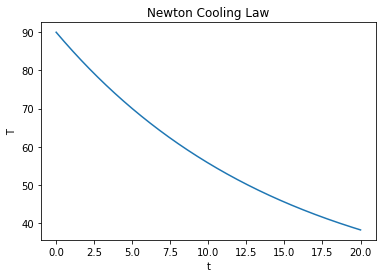

In [89]:
cooling(90,5,70,20)

In conclusion, `dsolve` is a useful tool for double checking your work and presenting it to others. Similarly `classify_ode` by itself is a useful tool for determining the type of differential equation which is good information to have when trying to determine the best solving method. 

### 5. Exercises

1. Classify and evaluate the following 
    * $\sin{x^3} y' + \cos(x) y = x y' + 2$
    * $\tan(t)^2 - \frac{y'}{e^{2*t}} + t^t = y t^7$
    
2. A mathematics student and a computer science student go get a cup of coffee together. The computer science student challenges the mathematics student to come up with an equation to model the cooling of the coffee since the students will only drink the coffee once it reaches 54 degrees. The initial temperature of the coffee is measured to be 87 degrees. After 7 minutes, the temperature drops to 70 degrees. Assuming the room remains at a constant temperature of 21 degrees, use the graph to approximate how long the students should wait.
